<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Normalization Techniques**


Estimated time needed: **30** minutes


In this lab, you will focus on data normalization. This includes identifying compensation-related columns, applying normalization techniques, and visualizing the data distributions.


## Objectives


In this lab, you will perform the following:


- Identify duplicate rows and remove them.

- Check and handle missing values in key columns.

- Identify and normalize compensation-related columns.

- Visualize the effect of normalization techniques on data distributions.


-----


## Hands on Lab


#### Step 1: Install and Import Libraries


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2: Load the Dataset into a DataFrame


We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.


The functions below will download the dataset into your browser:


In [4]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"

df = pd.read_csv(file_path)

# Display the first few rows to check if data is loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [5]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

### Section 1: Handling Duplicates
##### Task 1: Identify and remove duplicate rows.


In [6]:
#find duplicate rows
duplicate_rows = df[df.duplicated()]
#remove them excluding ResponseId
df_cleaned=df.drop_duplicates (subset=[col for col in df.columns if col != 'ResponseId'])
print(f"Number of rows before removing duplicates: {len(df)}")
print(f"Number of rows after removing duplicates: {len(df_cleaned)}")

Number of rows before removing duplicates: 65457
Number of rows after removing duplicates: 64950


### Section 2: Handling Missing Values
##### Task 2: Identify missing values in `CodingActivities`.


In [7]:
#Missing values
miss_values_CodingActivities = df['CodingActivities'].isnull().sum()
print(f"Number of missing values from CodingActivities is: {miss_values_CodingActivities}")

Number of missing values from CodingActivities is: 10977


##### Task 3: Impute missing values in CodingActivities with forward-fill.


In [8]:
#Impute missing values
CodingActivities_impute=df['CodingActivities'].ffill()

miss_values_CodingActivities = df['CodingActivities'].isnull().sum()
print(f"Number of missing values from CodingActivities after impute: {CodingActivities_impute}")

Number of missing values from CodingActivities after impute: 0                                                    Hobby
1        Hobby;Contribute to open-source projects;Other...
2        Hobby;Contribute to open-source projects;Other...
3        Hobby;Contribute to open-source projects;Other...
4        Hobby;Contribute to open-source projects;Other...
                               ...                        
65452    Hobby;Contribute to open-source projects;Schoo...
65453                        Hobby;Freelance/contract work
65454    Bootstrapping a business;School or academic wo...
65455                         I don’t code outside of work
65456                         I don’t code outside of work
Name: CodingActivities, Length: 65457, dtype: object


**Note**:  Before normalizing ConvertedCompYearly, ensure that any missing values (NaN) in this column are handled appropriately. You can choose to either drop the rows containing NaN or replace the missing values with a suitable statistic (e.g., median or mean).


### Section 3: Normalizing Compensation Data
##### Task 4: Identify compensation-related columns, such as ConvertedCompYearly.
Normalization is commonly applied to compensation data to bring values within a comparable range. Here, you’ll identify ConvertedCompYearly or similar columns, which contain compensation information. This column will be used in the subsequent tasks for normalization.


In [9]:
# Check for compensation-related columns by looking for keywords like 'Comp', 'Salary', etc.
compensation_columns = [col for col in df.columns if 'Comp' in col or 'Salary' in col]

# Print the identified compensation-related columns
print("Compensation-related columns found:")
print(compensation_columns)


Compensation-related columns found:
['CompTotal', 'AIComplex', 'ConvertedCompYearly']


##### Task 5: Normalize ConvertedCompYearly using Min-Max Scaling.
Min-Max Scaling brings all values in a column to a 0-1 range, making it useful for comparing data across different scales. Here, you will apply Min-Max normalization to the ConvertedCompYearly column, creating a new column ConvertedCompYearly_MinMax with normalized values.


In [10]:
# Replace null values with the mean of the column
avg_ConvertedCompYearly = df['ConvertedCompYearly'].mean()
df['ConvertedCompYearly'] = df['ConvertedCompYearly'].fillna(avg_ConvertedCompYearly)

# Apply Min-Max scaling to the ConvertedCompYearly column and create a new column
df['ConvertedCompYearly_MinMax'] = df['ConvertedCompYearly'] / df['ConvertedCompYearly'].max()

# Check the result
print(df[['ConvertedCompYearly', 'ConvertedCompYearly_MinMax']].tail())


       ConvertedCompYearly  ConvertedCompYearly_MinMax
65452         86158.926569                    0.005300
65453         86158.926569                    0.005300
65454           997.000000                    0.000061
65455         86158.926569                    0.005300
65456         86158.926569                    0.005300


##### Task 6: Apply Z-score Normalization to `ConvertedCompYearly`.

Z-score normalization standardizes values by converting them to a distribution with a mean of 0 and a standard deviation of 1. This method is helpful for datasets with a Gaussian (normal) distribution. Here, you’ll calculate Z-scores for the ConvertedCompYearly column, saving the results in a new column ConvertedCompYearly_Zscore.


In [11]:
# Calculate Z-score normalization and create a new column
df['ConvertedCompYearly_Zscore'] = (df['ConvertedCompYearly'] - df['ConvertedCompYearly'].mean()) / df['ConvertedCompYearly'].std()

# Check the result
print(df[['ConvertedCompYearly', 'ConvertedCompYearly_Zscore']].tail())

       ConvertedCompYearly  ConvertedCompYearly_Zscore
65452         86158.926569                    0.000000
65453         86158.926569                    0.000000
65454           997.000000                   -0.762097
65455         86158.926569                    0.000000
65456         86158.926569                    0.000000


### Section 4: Visualization of Normalized Data
##### Task 7: Visualize the distribution of `ConvertedCompYearly`, `ConvertedCompYearly_Normalized`, and `ConvertedCompYearly_Zscore`

Visualization helps you understand how normalization changes the data distribution. In this task, create histograms for the original ConvertedCompYearly, as well as its normalized versions (ConvertedCompYearly_MinMax and ConvertedCompYearly_Zscore). This will help you compare how each normalization technique affects the data range and distribution.


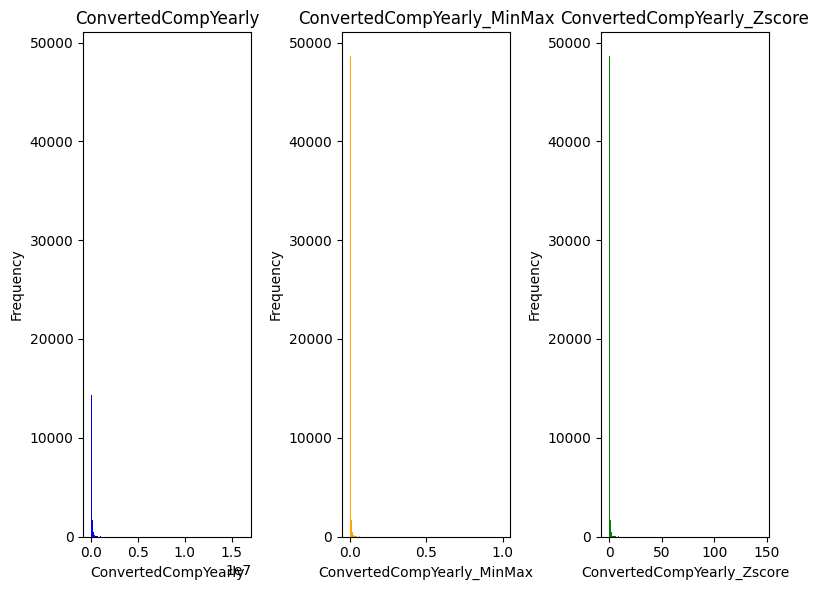

In [13]:
#create the figure
plt.figure(figsize=(8, 6))

# Plot histogram for ConvertedCompYearly
plt.subplot(1, 3, 1)
plt.hist(df['ConvertedCompYearly'], bins=200, color='blue')
plt.title('ConvertedCompYearly')
plt.xlabel('ConvertedCompYearly')
plt.ylabel('Frequency')

# Plot histogram for ConvertedCompYearly_MinMax
plt.subplot(1, 3, 2)
plt.hist(df['ConvertedCompYearly_MinMax'], bins=200, color='orange')
plt.title('ConvertedCompYearly_MinMax')
plt.xlabel('ConvertedCompYearly_MinMax')
plt.ylabel('Frequency')

# Plot histogram for ConvertedCompYearly_Zscore
plt.subplot(1, 3, 3)
plt.hist(df['ConvertedCompYearly_Zscore'], bins=200, color='green')
plt.title('ConvertedCompYearly_Zscore')
plt.xlabel('ConvertedCompYearly_Zscore')
plt.ylabel('Frequency')

# Show all the plots at once
plt.tight_layout()
plt.show()





### Summary


In this lab, you practiced essential normalization techniques, including:

- Identifying and handling duplicate rows.

- Checking for and imputing missing values.

- Applying Min-Max scaling and Z-score normalization to compensation data.

- Visualizing the impact of normalization on data distribution.


Copyright © IBM Corporation. All rights reserved.
